# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Piccinelli

Student name: Samuele
    
ID: 1170818 (LT)

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
#helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1170818 #place a random seed
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
#rescale the data
X, y = X / 255., y #original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#Random permute the data and split into training and test taking the first 600
#data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [59 55 63 65 47 54 61 69 61 66]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


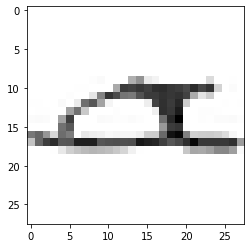

LABEL: 5
INPUT:


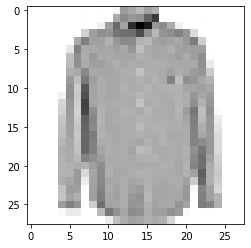

LABEL: 6
INPUT:


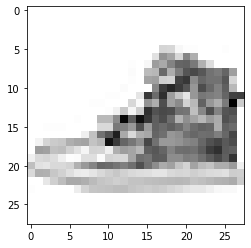

LABEL: 7
INPUT:


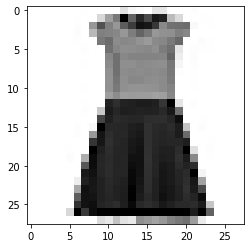

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

#parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM
clf = GridSearchCV(SVC(kernel = 'linear', random_state = ID), parameters, cv = 4)
clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='linear', random_state=1170818),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [9]:
print ('RESULTS FOR LINEAR KERNEL \n')

print("Number of cross-validation splits: {}".format(clf.n_splits_))
print("Best parameters set found: {}".format(clf.best_params_))
print("Score with best parameters: {:.5}".format(clf.best_score_))
print("\nAll scores on the grid: \n")
for i, mean, std in zip(parameters['C'], clf.cv_results_['mean_test_score'], clf.cv_results_['std_test_score']):
    print("Mean test score for C = {}: {:.5} +/- {:.5}".format(i, mean, std))

RESULTS FOR LINEAR KERNEL 

Number of cross-validation splits: 4
Best parameters set found: {'C': 0.1}
Score with best parameters: 0.795

All scores on the grid: 

Mean test score for C = 0.001: 0.57833 +/- 0.022791
Mean test score for C = 0.01: 0.765 +/- 0.034116
Mean test score for C = 0.1: 0.795 +/- 0.031754
Mean test score for C = 1: 0.78833 +/- 0.031047
Mean test score for C = 10: 0.78833 +/- 0.031047
Mean test score for C = 100: 0.78833 +/- 0.031047


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [10]:
# parameters for poly with degree 2 kernel
parameters2 = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel
clf2 = GridSearchCV(SVC(kernel = 'poly', degree = 2, random_state = ID), parameters2, cv = 4)
clf2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(degree=2, kernel='poly', random_state=1170818),
             param_grid={'C': [0.05, 0.5, 5], 'gamma': [0.05, 0.5, 5.0]})

In [11]:
print ('RESULTS FOR POLY DEGREE=2 KERNEL \n')

print("Number of cross-validation splits: {}".format(clf2.n_splits_))
print("Best parameters set found: {}".format(clf2.best_params_))
print("Score with best parameters: {:.5}".format(clf2.best_score_))
print("\nAll scores on the grid: \n")
for i, mean, std in zip(clf2.cv_results_['params'], clf2.cv_results_['mean_test_score'], clf2.cv_results_['std_test_score']):
    print("Mean test score for C = {} and gamma = {}: {:.5} +/- {:.5}".format(i['C'], i['gamma'], mean, std))

RESULTS FOR POLY DEGREE=2 KERNEL 

Number of cross-validation splits: 4
Best parameters set found: {'C': 0.05, 'gamma': 0.5}
Score with best parameters: 0.80167

All scores on the grid: 

Mean test score for C = 0.05 and gamma = 0.05: 0.74833 +/- 0.024664
Mean test score for C = 0.05 and gamma = 0.5: 0.80167 +/- 0.035707
Mean test score for C = 0.05 and gamma = 5.0: 0.80167 +/- 0.035707
Mean test score for C = 0.5 and gamma = 0.05: 0.79 +/- 0.037859
Mean test score for C = 0.5 and gamma = 0.5: 0.80167 +/- 0.035707
Mean test score for C = 0.5 and gamma = 5.0: 0.80167 +/- 0.035707
Mean test score for C = 5 and gamma = 0.05: 0.80167 +/- 0.035707
Mean test score for C = 5 and gamma = 0.5: 0.80167 +/- 0.035707
Mean test score for C = 5 and gamma = 5.0: 0.80167 +/- 0.035707


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [12]:
# parameters for poly with higher degree kernel
parameters4 = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
clf4 = GridSearchCV(SVC(kernel = 'poly', degree = 4, random_state = ID), parameters4, cv = 4)
clf4.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(degree=4, kernel='poly', random_state=1170818),
             param_grid={'C': [0.05, 0.5, 5], 'gamma': [0.05, 0.5, 5.0]})

In [13]:
print ('RESULTS FOR POLY DEGREE=4 KERNEL \n')

print("Number of cross-validation splits: {}".format(clf4.n_splits_))
print("Best parameters set found: {}".format(clf4.best_params_))
print("Score with best parameters: {:.5}".format(clf4.best_score_))
print("\nAll scores on the grid: \n")
for i, mean, std in zip(clf4.cv_results_['params'], clf4.cv_results_['mean_test_score'], clf4.cv_results_['std_test_score']):
    print("Mean test score for C = {} and gamma = {}: {:.5} +/- {:.5}".format(i['C'], i['gamma'], mean, std))

RESULTS FOR POLY DEGREE=4 KERNEL 

Number of cross-validation splits: 4
Best parameters set found: {'C': 0.5, 'gamma': 0.05}
Score with best parameters: 0.75833

All scores on the grid: 

Mean test score for C = 0.05 and gamma = 0.05: 0.73833 +/- 0.032102
Mean test score for C = 0.05 and gamma = 0.5: 0.73 +/- 0.034157
Mean test score for C = 0.05 and gamma = 5.0: 0.73 +/- 0.034157
Mean test score for C = 0.5 and gamma = 0.05: 0.75833 +/- 0.044064
Mean test score for C = 0.5 and gamma = 0.5: 0.73 +/- 0.034157
Mean test score for C = 0.5 and gamma = 5.0: 0.73 +/- 0.034157
Mean test score for C = 5 and gamma = 0.05: 0.73 +/- 0.034157
Mean test score for C = 5 and gamma = 0.5: 0.73 +/- 0.034157
Mean test score for C = 5 and gamma = 5.0: 0.73 +/- 0.034157


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [14]:
# parameters for rbf SVM
parameters_rbf = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel
clf_rbf = GridSearchCV(SVC(kernel = 'rbf', random_state = ID), parameters_rbf, cv = 4)
clf_rbf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=1170818),
             param_grid={'C': [0.5, 5, 50, 500],
                         'gamma': [0.005, 0.05, 0.5, 5]})

In [15]:
print ('RESULTS FOR rbf KERNEL \n')

print("Number of cross-validation splits: {}".format(clf_rbf.n_splits_))
print("Best parameters set found: {}".format(clf_rbf.best_params_))
print("Score with best parameters: {:.5}".format(clf_rbf.best_score_))
print("\nAll scores on the grid: \n")
for i, mean, std in zip(clf_rbf.cv_results_['params'], clf_rbf.cv_results_['mean_test_score'], clf_rbf.cv_results_['std_test_score']):
    print("Mean test score for C = {} and gamma = {}: {:.5} +/- {:.5}".format(i['C'], i['gamma'], mean, std))

RESULTS FOR rbf KERNEL 

Number of cross-validation splits: 4
Best parameters set found: {'C': 50, 'gamma': 0.005}
Score with best parameters: 0.80667

All scores on the grid: 

Mean test score for C = 0.5 and gamma = 0.005: 0.715 +/- 0.019076
Mean test score for C = 0.5 and gamma = 0.05: 0.69667 +/- 0.036056
Mean test score for C = 0.5 and gamma = 0.5: 0.115 +/- 0.0028868
Mean test score for C = 0.5 and gamma = 5: 0.115 +/- 0.0028868
Mean test score for C = 5 and gamma = 0.005: 0.795 +/- 0.029954
Mean test score for C = 5 and gamma = 0.05: 0.76333 +/- 0.032146
Mean test score for C = 5 and gamma = 0.5: 0.12833 +/- 0.0028868
Mean test score for C = 5 and gamma = 5: 0.115 +/- 0.0028868
Mean test score for C = 50 and gamma = 0.005: 0.80667 +/- 0.033665
Mean test score for C = 50 and gamma = 0.05: 0.76333 +/- 0.032146
Mean test score for C = 50 and gamma = 0.5: 0.12833 +/- 0.0028868
Mean test score for C = 50 and gamma = 5: 0.115 +/- 0.0028868
Mean test score for C = 500 and gamma = 0.005

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

With the given portion of dataset and the random seed, the performance of all $3$ kernels' score distributes around $\sim80\%$. RBF shows the best performance, while the polynomial of degree $4$ has the lowest score.<br>
For further analysis the RBF kernel is chosen, with the found best parameters $C = 50$ and $\gamma = 0.005$.

## TO DO 5
Report here the best SVM kernel and parameters

In [16]:
#get training and test error for the best SVM model from CV
models = np.array(["linear", "poly. deg=2", "poly. deg=4", "RBF"])
scores = np.array([clf.best_score_, clf2.best_score_, clf4.best_score_, clf_rbf.best_score_])
best_SVM_score = np.amax(scores)
index = [i for i, j in enumerate(scores) if j == best_SVM_score]
print("Best scored obdained with the {} kernel model.".format(models[index][0]))

Best scored obdained with the RBF kernel model.


In [17]:
best_SVM = GridSearchCV(SVC(kernel = 'rbf', random_state = ID), param_grid = {'C': [50],'gamma':[0.005]}, cv = 4)
best_SVM.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=1170818),
             param_grid={'C': [50], 'gamma': [0.005]})

In [18]:
#(error is 1 - svm.score)
training_error = 1. - best_SVM.score(X_train, y_train)
test_error = 1. - best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.206750


From now on the training error is $0.0$ for all models trained, which is not due to a data type error, nor to the particular choice of random seed. With the exception of the logistic regression with regularization, the models trained overfit the data (since $\varepsilon_{test} \gg \varepsilon_{train}$); most likely a greater number of instances would fix this issue. Plus, changing $C$ from $50\rightarrow 5$ leads to a higher $\varepsilon_{train}$, meaning that the model with the given $C = 50$ tries to minimize as much as possible the misclassified samples - in this case reaching $0$ error.

## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [19]:
#Function to plot the data and classification boundaries. 

def plot_data(model, X_train, y_train, X_test, y_test):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
        
    #Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    #Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],train_error))
    
    #Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],test_error))
    
    plt.show()

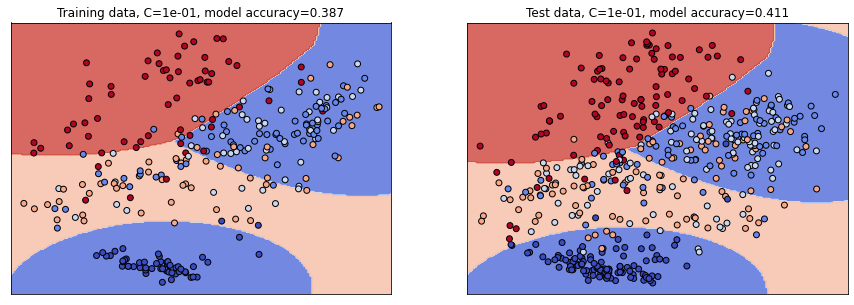

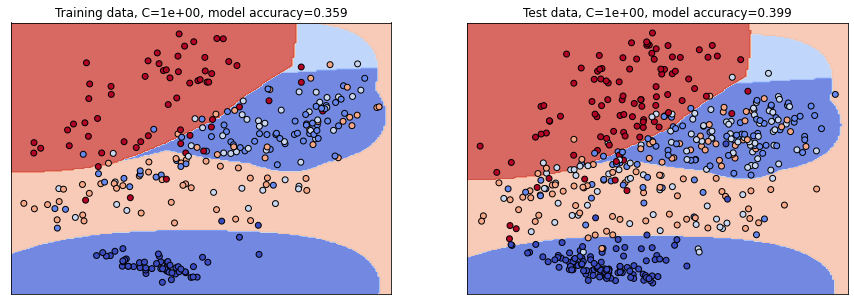

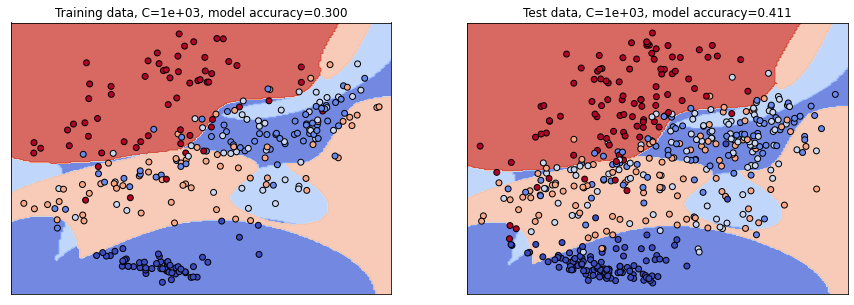

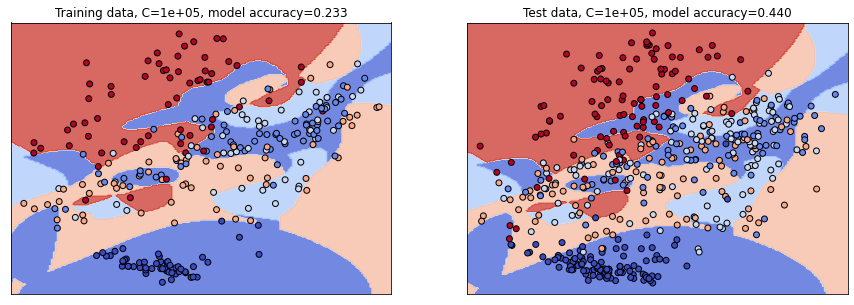

In [20]:
#Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

#Perform classification only on subset of original classes for better visualization

class_list = [1,2,4,6,8] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


#The dimensionality is reduced to 2 for visualization using PCA
#PCA: Reduce the dimensionality trying to preserve the information content. 
#PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    my_svm = SVC(kernel = 'rbf', C = C, gamma = gamma, random_state = ID).fit(X_train_pca, y_train_plot)
    train_error = 1. - my_svm.score(X_train_pca, y_train_plot)
    test_error = 1. - my_svm.score(X_test_pca, y_test_plot)
       
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

With increasing values of $C$ the shape of boundaries become more and more complex as expected, since the parameter $C$ in *sklearn* (which corresponds to $\lambda$ in theory) controls the trade-off between respectively low/large margin and less/some errors. Trying for different classes leads to similar results.

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [21]:
#Test with different values of gamma

#Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [22]:
train_acc_list, test_acc_list = [], []

for gamma in gamma_values:
    my_svm = SVC(kernel = 'rbf', C = 1, gamma = gamma, random_state = ID).fit(X_train, y_train)
    train_acc_list.append(1. - my_svm.score(X_train, y_train))
    test_acc_list.append(1. - my_svm.score(X_test, y_test))

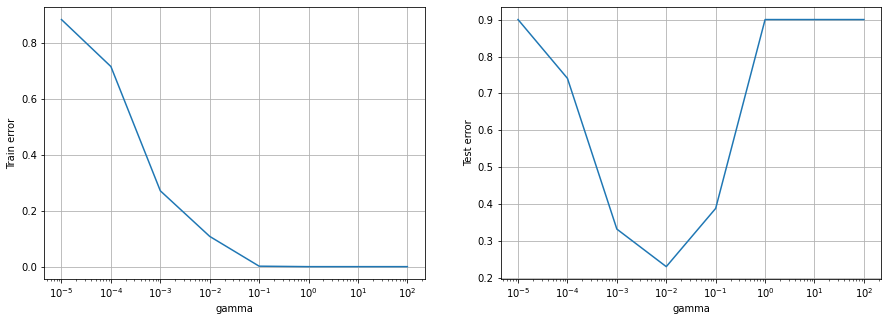

In [23]:
#Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train error')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test error')
ax[1].grid(True)

plt.show()

## QUESTION 3
How do the train and test error change when changing gamma? Which is the best value of gamma? 
Connect your answers to the discussion about the overfitting issue.

The train error decreases with the increase of $\gamma$: a high $\gamma$ value corresponds to a model which precisely fits the training set - with resulting risk of overfitting. As a matter of fact, for $\gamma$ in this interval, the test error saturates to its highest value, meaning that the model is not prone to generalisation. On the other hand, a lower value of $\gamma$ leads to a less accurate but more general solution. The best value of $\gamma$ would be the one corresponding to an error around the same value for both train and test set, e.g. $\varepsilon_{train / test}\sim10^{-3}/10^{-2}$.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [24]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [152 143 135 128 155 174 145 150 159 159]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [25]:
best_SVM = GridSearchCV(SVC(kernel = 'rbf', random_state = ID), param_grid = {'C': [50],'gamma':[0.005]}, cv = 4)
best_SVM.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=1170818),
             param_grid={'C': [50], 'gamma': [0.005]})

In [26]:
#get training and test error for the best SVM model from CV

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.173214


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 1e8, random_state = ID, max_iter = 1e6)
log_reg.fit(X_train, y_train)

training_error = 1. - log_reg.score(X_train,y_train)
test_error = 1. - log_reg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.211932


## TO DO 10 Try  with regularization (use C=1)¶

In [28]:
log_reg1 = LogisticRegression(random_state = ID, max_iter = 1e6) #C = 1 by default
log_reg1.fit(X_train, y_train)

training_error = 1. - log_reg1.score(X_train,y_train)
test_error = 1. - log_reg1.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.006667
Best regularized logistic regression test error: 0.188051


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

By increasing the size of the dataset, the test error decreases - as expected, since a model trained on a greater number of instances generalizes better.

After fixing $m = 1500$, using SVM gives the best test error. Adding the regularisation to the logistic regression helps lowering the test error: in this case some training error "is allowed" in order to decrease the test error.

## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [29]:
LR_prediction = log_reg1.predict(X_test) #predictions on the test set
SVM_prediction = best_SVM.predict(X_test)

INPUT:


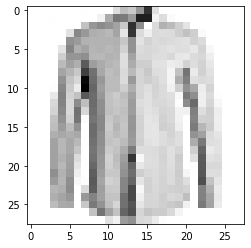

LABEL: 6


In [30]:
first = True

for i in range(m_training):
    if LR_prediction[i] != y_test[i] and SVM_prediction[i] == y_test[i]:
        if first:
            plot_input(X_test,y_test,i)
            first = False

## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [31]:
from sklearn.metrics import confusion_matrix

np.set_printoptions(precision=2, suppress=True) #for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5848 5857 5865 5872 5845 5826 5855 5850 5841 5841]

 Confusion matrix SVM  
 
 [[4788   18  129  206   24    7  578    0   96    2]
 [  39 5629   36  119    8    1   20    0    5    0]
 [  84   11 3983   48  997    5  671    0   66    0]
 [ 352  120  160 4882  197    0  139    0   22    0]
 [  24    9  634  348 4359    2  441    0   28    0]
 [   2    3    2    9    0 5294    1  323   30  162]
 [ 981    8  781  162  603    3 3173    0  142    2]
 [   0    0    0    0    0  333    0 5206    9  302]
 [  17    7   44   41   32   61   58   25 5546   10]
 [   1    2    0    9    3   87    0  229    3 5507]]

 Confusion matrix SVM (normalized)   
 
 [[0.82 0.   0.02 0.04 0.   0.   0.1  0.   0.02 0.  ]
 [0.01 0.96 0.01 0.02 0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.68 0.01 0.17 0.   0.11 0.   0.01 0.  ]
 [0.06 0.02 0.03 0.83 0.03 0.   0.02 0.   0.   0.  ]
 [0.   0.   0.11 0.06 0.75 0.   0.08 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.91 0.   0.06 0.0

To get a better visualisation of the normalized confusion matrices, the *seaborn* library is used.

<AxesSubplot:title={'center':'Normalized confusion matrix for LR'}>

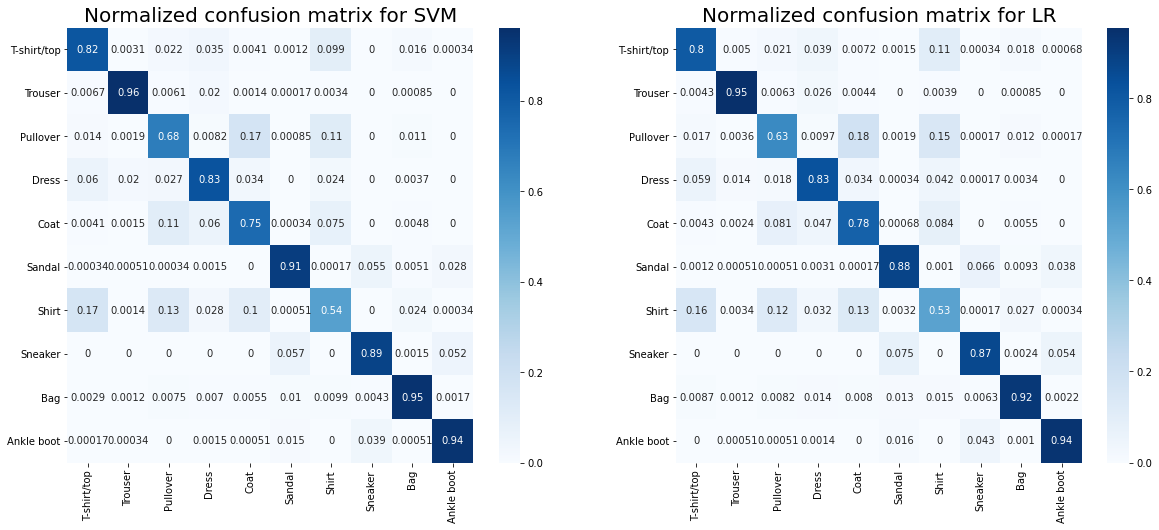

In [32]:
import pandas as pd
import seaborn as sns
labels = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker','Bag', 'Ankle boot']
df_SVM = pd.DataFrame(confusion_SVM /counts[:,None], labels, labels) #rectangular dataset
df_LR = pd.DataFrame(confusion_LR /counts[:,None], labels, labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))
ax1.set_title("Normalized confusion matrix for SVM", size = 20)
ax2.set_title("Normalized confusion matrix for LR", size = 20)
sns.heatmap(df_SVM, annot=True, cmap='Blues', ax=ax1)
sns.heatmap(df_LR, annot=True, cmap='Blues', ax=ax2)

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


The diagonal elements in the confusion matrices represent the number of cases for which the predicted label is equal to the true label, while off-diagonal elements are those that are misslabeled by the classifier. Consequently, the closer the diagonal values of the confusion matrix are to $1$, the better.

Both models perform properly, as it can be seen from the plots above. The lowest values of accuracy is reached for shirts: this is likely due to the shared features they have in common with T-shirts, coats and pullovers, which make them harder to distinguish. With a less visible effect, this is also the case for sandals and sneakers.